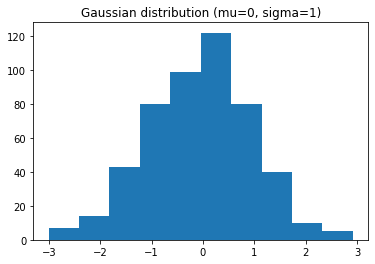

In [2]:
from random import gauss
import matplotlib.pyplot as plt
%matplotlib inline

l = [gauss(0, 1) for _ in range(500)]
plt.hist(l)
plt.title('Gaussian distribution (mu=0, sigma=1)')
plt.show()

---------
# GLT

In [9]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv -O glt.csv

--2022-04-08 22:25:22--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/GLT_filtered.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12720645 (12M) [text/plain]
Saving to: ‘glt.csv’

glt.csv             100%[===================>]  12,13M  38,8MB/s    in 0,3s    

2022-04-08 22:25:22 (38,8 MB/s) - ‘glt.csv’ saved [12720645/12720645]



In [7]:
import csv
import numpy as np
import pandas as pd

In [1]:
with open("glt.csv", "r") as f:
    lol = []
    for cols in csv.reader(f):
        lol.append(cols)
    lol = np.array(lol)
        

In [64]:
avg_temp = np.array(lol)[:, 1]
avg_temp[1:]

array(['26.704', '27.434', '', ..., '12.399', '4.7360000000000015',
       '-0.8220000000000001'], dtype='<U34')

In [2]:
def str_to_float(l:list) -> list:
    """Return the same list but with float values

    Args:
        l (list): input list of str values

    Returns:
        list: output list filled with None and floats
    """
    return [None if i == '' else float(i) for i in l]

def pick_forward_value(li:list, index:int=0) -> float:
    for i in range(index + 1, len(li)):
        if li[i] == None:
            continue
        else:
            return float(li[i])

def pick_backward_value(li:list, index:int=-1) -> float:        
    for i in range(index - 1 , 0 - 1, -1):
        if li[i] == None:
            continue
        else:
            return float(li[i])
    return None

import copy

def fill_list(original_list:list) -> list:
    # Transform the list if it has strings instead of floats
    original_list = str_to_float(original_list)
    
    # Make a copy that we will fill
    newl = copy.deepcopy(original_list)
    
    # Subsitute values
    for i in range(len(original_list)):
        #### initial value ####
        if (i == 0):  
            if (original_list[i] == None): 
                val1 = pick_forward_value(original_list, i)
                val = val1/2
                newl[i] = val
            else:
                val = original_list[i]
                continue
        #### last value ####
        elif (i == len(original_list)-1):
            if original_list[i] == None: 
                val1 = pick_backward_value(original_list, i)
                val = val1/2
                newl[i] = val
            else:
                newl[i] = original_list[i]
                continue
        #### inner values ####
        else:
            if original_list[i] == None:
                # Save in the val variable the last computed value
                # Hence we can use it without checking the list
                val1 = pick_forward_value(original_list, i)
                if val1 == None:
                    val = (val + val)/2
                else:
                    val = (val + val1)/2
                newl[i] = val
            else:
                continue
    return newl

In [3]:
# To take every city we can exploit the set function 
# (it doesn't take care of the order)
cities = list(set(lol[1:,3])) 
# Since the cities are sorted alphabetically,
# we have used the set function and then sorted
# the outcoming list
cities.sort() # sort alphabetically in place

d = dict()
# Fill the dictionary with keys as the name of city
# and as values a tuple containing the range of indexes
for city in cities:
    index = 0
    indexes = list()
    for row in lol[1:,3]:
        if row == city:    
            indexes.append(index)
            index += 1
        else: 
            index += 1
    d[city] = min(indexes), max(indexes)

In [4]:
for city in cities:
    tp = d[city] # tuple containing the range of indexes
    start_index = tp[0] + 1 # + 1 to take into account the header
    stop_index = tp[1] + 2 # + 1 for the header, the other + 1 is due to the fact that the slice doesn't include the stop index 
    # Fill the temperature and then set them
    temp_filled = fill_list(lol[tp[0]+1:tp[1]+2][:,1])
    lol[tp[0]+1:tp[1]+2][:,1] = temp_filled
    # Do the same for the standard deviation
    std_filled = fill_list(lol[tp[0]+1:tp[1]+2][:,2])
    lol[tp[0]+1:tp[1]+2][:,2] = std_filled


In [8]:
df = pd.DataFrame(lol[1:], columns=lol[0])

In [9]:
df.info() # to check if everything is filled

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219575 entries, 0 to 219574
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype 
---  ------                         --------------   ----- 
 0   Date                           219575 non-null  object
 1   AverageTemperature             219575 non-null  object
 2   AverageTemperatureUncertainty  219575 non-null  object
 3   City                           219575 non-null  object
 4   Country                        219575 non-null  object
 5   Latitude                       219575 non-null  object
 6   Longitude                      219575 non-null  object
dtypes: object(7)
memory usage: 11.7+ MB


In [10]:
from typing import Tuple

def get_topN_temp(df = pd.DataFrame, city_name:str=None, N:int=0) -> Tuple:
    mask = df['City'] == city_name
    # Pick the last N values in the sorted list in ascendent order,
    # then change the order
    hot = sorted(df[mask]['AverageTemperature'])[-N:][::-1]
    # Pick the first N values in the sorted list in ascendent order
    cold = sorted(df[mask]['AverageTemperature'])[:N]
    return hot, cold


In [13]:
N = 3
for city in cities:
    hot, cold = get_topN_temp(df, city, N=N)
    print(f'Top {N} temperatures of {city}:')
    print(f'\tHot\t{hot}')
    print(f'\tCold\t{cold}')

Top 3 temperatures of Abidjan:
	Hot	['29.923', '29.596', '29.477']
	Cold	['22.363000000000003', '22.377', '22.528']
Top 3 temperatures of Addis Abeba:
	Hot	['21.223000000000006', '21.156', '20.826']
	Cold	['14.527999999999999', '14.913', '14.98']
Top 3 temperatures of Ahmadabad:
	Hot	['35.41900000000001', '34.703', '34.486000000000004']
	Cold	['17.041', '17.305', '17.32']
Top 3 temperatures of Aleppo:
	Hot	['9.98', '9.971', '9.967']
	Cold	['1.0860000000000003', '1.1369999999999996', '1.4639999999999995']
Top 3 temperatures of Alexandria:
	Hot	['28.805999999999997', '28.613000000000003', '28.463']
	Cold	['11.253', '11.343', '11.49']
Top 3 temperatures of Ankara:
	Hot	['9.989', '9.987', '9.985']
	Cold	['-0.028000000000000025', '-0.03300000000000014', '-0.03400000000000003']
Top 3 temperatures of Baghdad:
	Hot	['9.992', '9.988', '9.978']
	Cold	['10.028', '10.035', '10.058']
Top 3 temperatures of Bangalore:
	Hot	['29.688000000000002', '29.218000000000004', '29.113000000000003']
	Cold	['20.

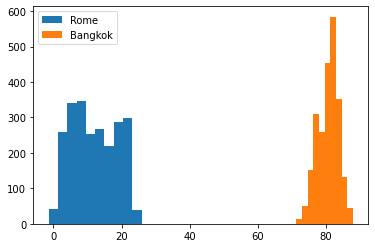

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

rome = df['City'] == 'Rome'
bangkok = df['City'] == 'Bangkok'
rome_temp = df[rome]['AverageTemperature']
bangkok_temp = df[bangkok]['AverageTemperature']
plt.hist(str_to_float(list(rome_temp)), bins=10, label='Rome')
plt.hist(str_to_float(list(bangkok_temp)), bins=10, label='Bangkok')
#plt.xticks(())
plt.legend()
plt.show()

In [29]:
def fahreneit_to_celsius(fahr_val:float) -> float:
    celsius = (fahr_val - 32)/1.8
    return celsius

def celsius_to_fahreneit(cels_val:float) -> float:
    fahreneit = 1.8*cels_val + 32
    return fahreneit

In [31]:
bangkok_celsius = []
for temp in bangkok_temp:
    cels = fahreneit_to_celsius(float(temp))
    bangkok_celsius.append(cels)

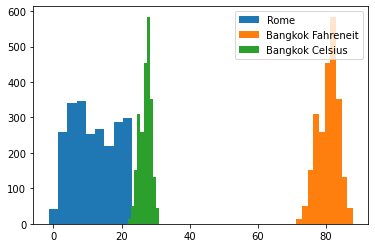

In [45]:
plt.hist(str_to_float(list(rome_temp)), bins=10, label='Rome')
plt.hist(str_to_float(list(bangkok_temp)), bins=10, label='Bangkok Fahreneit')
plt.hist(list(bangkok_celsius), bins=10, label='Bangkok Celsius')
#plt.xticks(())
plt.legend()
plt.show()

-----------------
# IMDb

In [46]:
!wget https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.txt -O imdb.csv

--2022-04-14 11:43:04--  https://raw.githubusercontent.com/dbdmg/data-science-lab/master/datasets/aclimdb_reviews_train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 33322169 (32M) [text/plain]
Saving to: ‘imdb.csv’

imdb.csv            100%[===================>]  31,78M  28,1MB/s    in 1,1s    

2022-04-14 11:43:07 (28,1 MB/s) - ‘imdb.csv’ saved [33322169/33322169]



In [47]:
import csv

with open("imdb.csv", "r") as f:
    imdb = []
    for cols in csv.reader(f):
        imdb.append(cols)
    imdb = np.array(imdb)

In [ ]:
imdb[1:]

In [50]:
import string
def tokenize(docs):
    """Compute the tokens for each document.
    Input: a list of strings. Each item is a document to tokenize.
    Output: a list of lists. Each item is a list containing the tokens of the
    relative document.
    """
    tokens = []
    for doc in docs:
        for punct in string.punctuation:
            doc = doc.replace(punct, " ")
        split_doc = [ token.lower() for token in doc.split(" ") if token ]
        tokens.append(split_doc)
    return tokens

In [58]:
tokenized_reviews = tokenize(imdb[1:,0])
num_documents = len(tokenized_reviews)

In [74]:
tot_list = []
for i in tokenized_reviews:
    tot_list+=i

In [77]:
tot_list = sorted(set(tot_list)) # list containing all tokens 1 time each

In [65]:
def term_frequency(doc:list) -> dict:
    terms = sorted(set(doc))
    dictionary = dict()
    for term in terms:
        cnt = 0
        for token in doc:
            if term == token:
                cnt += 1
            else:
                continue
        dictionary[term] = cnt
    return dictionary

In [169]:
# Build term frequency of each document
doc_id = 0
term_freq = dict()
for document in tokenized_reviews:    
    term_freq[doc_id] = term_frequency(document)
    doc_id += 1

In [136]:
''' Mine, inefficient.
def doc_frequency(term:string, list_of_documents:list) -> Tuple:
    cnt = 0
    for document in list_of_documents:
        if term in document:
            cnt += 1
        else:
            continue
    return (term, cnt)
'''

In [170]:
import math

def doc_frequency(list_of_documents:dict, inverse:bool=False) -> dict:
    doc_freq = dict()
    for document in list_of_documents.values():
        for token, tf in document.items():
            doc_freq[token] = doc_freq.get(token, 0) + 1 # 0 is the default value
    if inverse:
        n = len(list_of_documents)
        return {token: math.log(n/df) for token, df in doc_freq.items()}
    return doc_freq

In [171]:
idf = doc_frequency(term_freq, inverse=True)

In [143]:
N = 5
sorted(idf.items(), key=lambda x: x[1])[:N] # low values when the term appears in many (almost all) documents

[('the', 0.008314469604085238),
 ('a', 0.03351541933781697),
 ('and', 0.03401190259170586),
 ('of', 0.05226218466281087),
 ('to', 0.06293979977387414)]

In [189]:
def compute_tfidf(tokenized_reviews:list) -> list[dict]:
    doc_id = 0
    term_freq = dict()
    for document in tokenized_reviews:    
        term_freq[doc_id] = term_frequency(document)
        doc_id += 1

    idf = doc_frequency(term_freq, inverse=True)
    
    list_of_dict = list()
    for document_id, document in term_freq.items():
        tf_idf = {}
        for token, tf in document.items():
            tf_idf[token] = tf*idf[token]
        list_of_dict.append(tf_idf)
    
    return list_of_dict


In [190]:
tf_idf_1 = compute_tfidf(tokenized_reviews)

In [ ]:
tf_idf_1[0]

In [194]:
imdb[1:,1]

array(['1', '0', '1', ..., '0', '1', '0'], dtype='<U13704')

In [202]:
def extract_positive_negative_indexes(list_of_rev:list) -> tuple:
    """Extract indexes concerning
    positive and negative sentiment

    Args:
        list_of_rev (list): input list containing 2 labels
        '1' for positive sentiment,
        '0' for negative sentiment

    Returns:
        tuple: return the tuple containing positive list and
        negative list
    """
    
    index = 0
    positive = []
    negative = []
    for i in list_of_rev:
        if i == '1':
            positive.append(index)
            index += 1
        else:
            negative.append(index)
            index += 1
    return positive, negative

In [203]:
positive, negative = extract_positive_negative_indexes(imdb[1:,1])

In [ ]:
tf_idf_1[positive[0]]

In [ ]:
tf_idf_1[negative[0]]

In [206]:
def norm(d):
    """Compute the L2-norm of a vector representation."""
    return sum([ tf_idf**2 for t, tf_idf in d.items() ])**.5

def dot_product(d1, d2):
    """Compute the dot product between two vector representations."""
    word_set = set(list(d1.keys()) + list(d2.keys()))
    return sum([( d1.get(d, 0.0) * d2.get(d, 0.0)) for d in word_set ])

def cosine_similarity(d1, d2):
    """
    Compute the cosine similarity between documents d1 and d2.
    Input: two dictionaries representing the TF-IDF vectors for documents
    d1 and d2.
    Output: the cosine similarity.
    """
    return dot_product(d1, d2) / (norm(d1) * norm(d2))

In [208]:
tf_idf_pos = []
tf_idf_neg = []

for index in positive:
    tf_idf_pos.append(tf_idf_1[index])

for index in negative:
    tf_idf_neg.append(tf_idf_1[index])


In [220]:
d1 = tf_idf_1[0] # al momento sono gli stessi, va tolto in tf_idf_pos, fixato male
d2 = tf_idf_pos[4]

In [236]:
def mean(list_of_floats:list) -> float:
    length = len(list_of_floats)
    return sum(list_of_floats)/length

def mean_cosine_similarity(d1:dict, list_of_d2_dict:list) -> float:
    similarity_list = []
    for d2 in list_of_d2_dict:
        cs = cosine_similarity(d1,d2)
        if cs >= 0.999: # what a bad solution
            continue
        else:
            similarity_list.append(cs)
            
    return mean(similarity_list)

In [239]:
def sentiment_label(test_vector:dict, tf_idf_pos:list, tf_idf_neg:list):
    pos_val = mean_cosine_similarity(test_vector, tf_idf_pos)
    neg_val = mean_cosine_similarity(test_vector, tf_idf_neg)
    if pos_val > neg_val:
        return "Positive"
    elif pos_val < neg_val:
        return "Negative"
    else:
        return "Neutral"

In [242]:
sentiment_label(tf_idf_1[1], tf_idf_pos, tf_idf_neg)

'Positive'

0.009605359121433907